In [98]:
pip install sentence_transformers

In [99]:
pip install umap-learn


In [100]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


In [101]:

# Variables
corpus = []  # list of documents
embeddings = []  # documents embeddings of size NxM (N : number of documents, M : embedding dimension)
red_emb = []  # reduced embeddings matrix using dimensionality reduction
k = 20  # number of clusters
labels = []  # documents labels
pred = []  # list of clustering predicted clusters



In [102]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(mat)
    return pred


In [103]:
import pandas as pd

# Import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]

# Create a DataFrame
df = pd.DataFrame({'corpus': corpus, 'labels': labels})

# Save to CSV
df.to_csv('ng20_data.csv', index=False)

# Read from CSV
df_read = pd.read_csv('ng20_data.csv')

# Access the data
corpus = df_read['corpus'].tolist()
labels = df_read['labels'].tolist()

# Display first few rows
df_read.head()




,corpus,labels
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19


In [104]:
# Embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)



In [105]:
# # Perform dimensionality reduction using PCA
# red_emb_pca = dim_red(embeddings, 2)

# # Perform clustering using K-means with PCA
# pred_pca = clust(red_emb_pca, k)

# # Evaluate clustering results with PCA
# nmi_score_pca = normalized_mutual_info_score(pred_pca, labels)
# ari_score_pca = adjusted_rand_score(pred_pca, labels)

# print(f'PCA - NMI: {nmi_score_pca:.2f} \nPCA - ARI: {ari_score_pca:.2f}')


In [114]:
from sklearn.decomposition import PCA

def apply_acp(embeddings):
# Perform dimensionality reduction using PCA
  red_emb_pca = PCA(n_components=2).fit_transform(embeddings)

  # Perform clustering using K-means with PCA
  pred_pca = clust(red_emb_pca, k)

  # Evaluate clustering results with PCA
  nmi_score_pca = normalized_mutual_info_score(pred_pca, labels)
  ari_score_pca = adjusted_rand_score(pred_pca, labels)

  print(f'PCA - NMI: {nmi_score_pca:.2f} \nPCA - ARI: {ari_score_pca:.2f}')
  return nmi_score_pca, ari_score_pca, pred_pca, red_emb_pca



In [115]:
apply_acp(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCA - NMI: 0.29 
PCA - ARI: 0.10


(0.29110649625720025,
 0.09709057185890212,
 array([10,  4,  6, ..., 14,  0,  0], dtype=int32),
 array([[-0.7153524 ,  0.47101545],
        [-0.703487  , -0.3306788 ],
        [ 1.4789287 , -1.0283278 ],
        ...,
        [-0.47106737, -0.37938103],
        [-0.41148615, -1.1116239 ],
        [-0.3412401 , -0.5937508 ]], dtype=float32))

In [116]:
def apply_tsne(embeddings):
  # Perform dimensionality reduction using TSNE
  red_emb_tsne = TSNE(n_components=2).fit_transform(embeddings)

  # Perform clustering using K-means with TSNE
  pred_tsne = clust(red_emb_tsne, k)

  # Evaluate clustering results with TSNE
  nmi_score_tsne = normalized_mutual_info_score(pred_tsne, labels)
  ari_score_tsne = adjusted_rand_score(pred_tsne, labels)

  print(f'TSNE - NMI: {nmi_score_tsne:.2f} \nTSNE - ARI: {ari_score_tsne:.2f}')
  return nmi_score_tsne, ari_score_tsne, pred_tsne, red_emb_tsne

In [117]:
apply_tsne(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TSNE - NMI: 0.43 
TSNE - ARI: 0.24


(0.4282451236319316,
 0.24219331495798918,
 array([ 3, 13,  0, ...,  8, 13,  9], dtype=int32),
 array([[-25.408699 , -16.658022 ],
        [-51.68291  ,   3.0332613],
        [ 35.509052 , -20.265265 ],
        ...,
        [ -3.7398262, -14.225188 ],
        [-42.015167 ,  11.290518 ],
        [-13.284571 ,  34.75792  ]], dtype=float32))

In [118]:
def apply_umap(embeddings):
  # Perform dimensionality reduction using UMAP
  red_emb_umap = UMAP(n_components=2).fit_transform(embeddings)

  # Perform clustering using K-means with UMAP
  pred_umap = clust(red_emb_umap, k)

  # Evaluate clustering results with UMAP
  nmi_score_umap = normalized_mutual_info_score(pred_umap, labels)
  ari_score_umap = adjusted_rand_score(pred_umap, labels)

  print(f'UMAP - NMI: {nmi_score_umap:.2f} \nUMAP - ARI: {ari_score_umap:.2f}')
  return nmi_score_umap, ari_score_umap, pred_umap, red_emb_umap

In [119]:
apply_umap(embeddings)

UMAP - NMI: 0.45 
UMAP - ARI: 0.27


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.454429648251007,
 0.26910085780193,
 array([13, 15,  6, ...,  5,  4,  7], dtype=int32),
 array([[ 7.819286 ,  6.746053 ],
        [ 9.603019 ,  7.9875035],
        [ 4.119792 , 10.370501 ],
        ...,
        [ 6.766194 ,  8.265121 ],
        [ 9.743252 ,  7.099238 ],
        [ 9.240092 ,  9.922027 ]], dtype=float32))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCA - NMI: 0.29 
PCA - ARI: 0.10


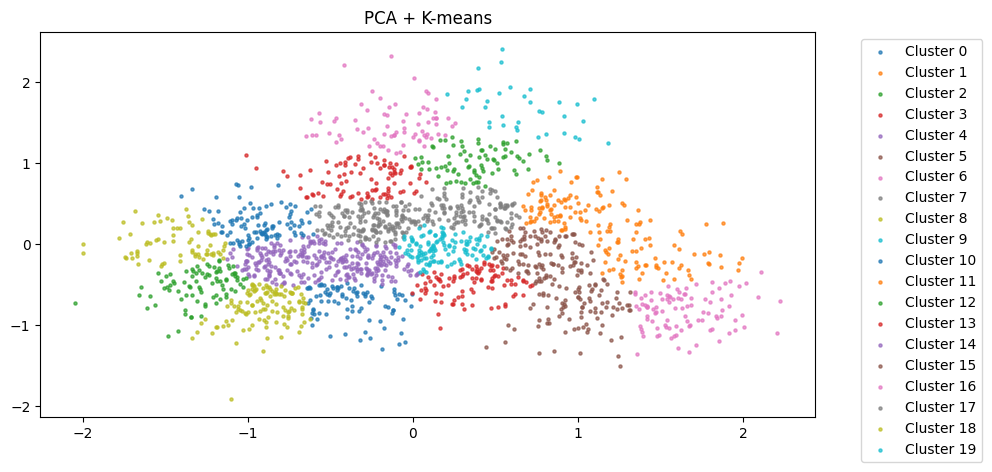

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TSNE - NMI: 0.42 
TSNE - ARI: 0.24


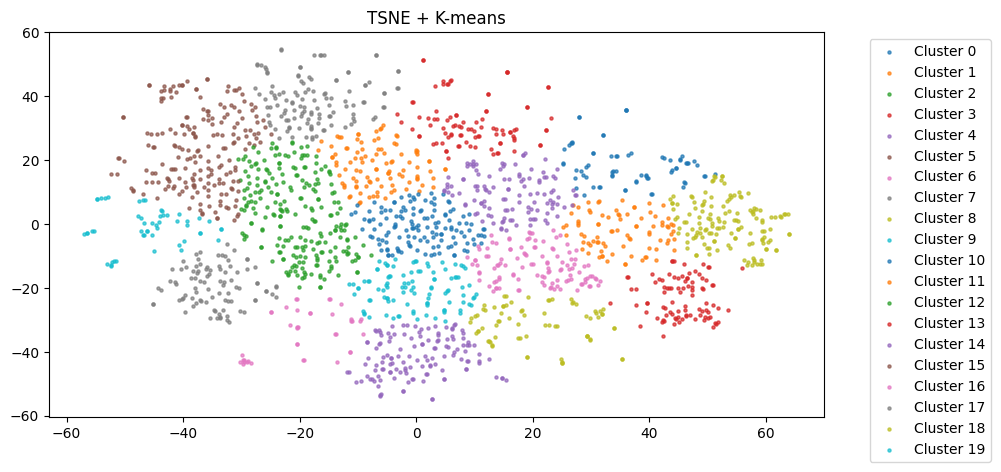

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


UMAP - NMI: 0.44 
UMAP - ARI: 0.25


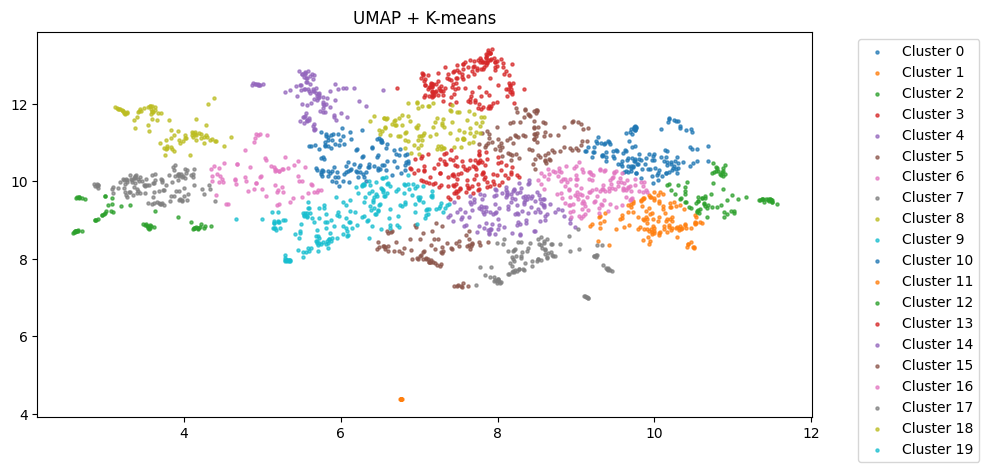

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming labels is the array of unique labels
labelss = np.unique(labels)

# Visualize data on a 2D plane using PCA, TSNE, and UMAP

# PCA
plt.figure(figsize=(10, 5))
nmi_score_pca, ari_score_pca, pred_pca, red_emb_pca = apply_acp(embeddings)
for label in labelss:
    indices = np.where(pred_pca == label)
    plt.scatter(red_emb_pca[indices, 0], red_emb_pca[indices, 1], label=f'Cluster {label}', s=5, alpha=0.7)
plt.title('PCA + K-means')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# TSNE
nmi_score_tsne, ari_score_tsne, pred_tsne, red_emb_tsne = apply_tsne(embeddings)
plt.figure(figsize=(10, 5))
for label in labelss:
    indices = np.where(pred_tsne == label)
    plt.scatter(red_emb_tsne[indices, 0], red_emb_tsne[indices, 1], label=f'Cluster {label}', s=5, alpha=0.7)
plt.title('TSNE + K-means')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# UMAP
nmi_score_umap, ari_score_umap, pred_umap, red_emb_umap = apply_umap(embeddings)
plt.figure(figsize=(10, 5))
for label in labelss:
    indices = np.where(pred_umap == label)
    plt.scatter(red_emb_umap[indices, 0], red_emb_umap[indices, 1], label=f'Cluster {label}', s=5, alpha=0.7)
plt.title('UMAP + K-means')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
